In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "jeopardy_csv.csv"

# Read Purchasing File and store into Pandas data frame
jeopardy_df = pd.read_csv(file_to_load)
jeopardy_df.head()


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


## How many rows are in the data frame? What does a row represent? What is the grain? 

In [2]:
#printing df shows us that it is 216930 rows and 7 columns. Each row represents a jeopardy question, answer, 
#and other relevant info. 
#grain is question
jeopardy_df.describe()

,Show Number
count,216930.000000
mean,4264.238519
std,1386.296335
min,1.000000
25%,3349.000000
50%,4490.000000
75%,5393.000000
max,6300.000000


## Clean the data. How do you clean? What is dirty about it? 


In [ ]:
#strip the crap out of the columns
jeopardy_df.columns= jeopardy_df.columns.str.rstrip()
jeopardy_df.columns=jeopardy_df.columns.str.lstrip()
#there are extra spaces in some of the column names

## How many unique shows a year? 

In [3]:

#rstrip
#strip the crap out of the columns
jeopardy_df.columns= jeopardy_df.columns.str.rstrip()
jeopardy_df.columns=jeopardy_df.columns.str.lstrip()
#use DatetimeIndex to separate out the year
jeopardy_df['year'] = pd.DatetimeIndex(jeopardy_df['Air Date']).year
jeopardy_df.head()

gb_year = jeopardy_df.groupby('year')
show_count = gb_year['Show Number'].nunique()
#print(show_count)
per_year_df = pd.DataFrame(
    {'Show Count':show_count})
#per_year_df = pd.DataFrame(
 #           {'Count of Shows': show_count})
per_year_df


,Show Count
year,
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32


##how many times was each category used? 

In [59]:
#operating under the assumption that it is how many questions came from each category, not how many shows did it appear in.
jeopardy_df.head()
gb_category = jeopardy_df.groupby('Category')
print(gb_category)

Category_series = gb_category['Category'].count()
category_df = pd.DataFrame(
    {'Count': Category_series})
category_df.sort_values('Count', ascending = False)






,Count
Category,
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
...,...
FOREIGN-BORN INVENTORS,1
WORD HISTORIES,1
FOREIGN WARS,1


#which month over the years had the most shows

In [40]:


#use DatetimeIndex to separate out the year
jeopardy_df['month'] = pd.DatetimeIndex(jeopardy_df['Air Date']).month
jeopardy_df.head()

gb_month = jeopardy_df.groupby('month')
show_count_month = gb_month['Show Number'].nunique()
per_month_df = pd.DataFrame(
   {'Show Count':show_count_month})
per_month_df.sort_values('Show Count', ascending = False)

#November had the most shows overall. 


,Show Count
month,
11,434
1,355
12,352
5,351
10,347
4,330
3,329
6,321
2,293


#Are there any answers that appeared multiple times? Find the question for the top three answers. 

In [54]:

#alternative to finding how many of each answer
jeopardy_df['Answer'].value_counts()



qa_df = pd.DataFrame(
   {'Count': answer})
 
display(qa_df.head(3))


#This is not at all how I wanted to do it, but I am out of ideas. 
top_list = ['China', 'Australia', 'Japan']
new_jeopardy_df = jeopardy_df.loc[jeopardy_df['Answer'].isin(top_list)]

newest_df = new_jeopardy_df.copy()
newest_df.sort_values('Answer', ascending = True)




,Count
China,216
Australia,215
Japan,196


,Show Number,Air Date,Round,Category,Value,Question,Answer,year
112944,484,10/16/1986,Jeopardy!,TRAVEL & TOURISM,$500,Country where 1000s of tourists flock each yea...,Australia,1986
60883,4686,1/10/2005,Jeopardy!,THE WEATHER CHANNEL,$800,"In terms of rainfall, it's the driest continen...",Australia,2005
61001,5927,5/25/2010,Jeopardy!,THE MIDDLE OF SOMEWHERE,$800,"Named for a cartographer, the Lambert Centre, ...",Australia,2010
132645,3156,4/27/1998,Jeopardy!,WHERE YA FROM?,$500,Elle Macpherson,Australia,1998
180467,4767,5/3/2005,Jeopardy!,MAY,$400,"May 13, 1787: 11 ships leave England on a voya...",Australia,2005
...,...,...,...,...,...,...,...,...
107934,5486,6/16/2008,Jeopardy!,LET'S GO SHOPPING,"$1,000",Takashimaya on 5th Avenue is a branch of one o...,Japan,2008
107497,4086,5/13/2002,Jeopardy!,AUTHORS' NATIVE LANDS,$200,"""The Remains of the Day"" novelist Kazuo Ishiguro",Japan,2002
107326,3468,10/6/1999,Jeopardy!,CHRONICLES,$100,You'll find the deeds of Emperor Jimmu in the ...,Japan,1999
105335,3308,1/13/1999,Jeopardy!,THEY'RE IN CHARGE,$100,Prime Minister Keizo Obuchi,Japan,1999


#Create a visualization that shows the top 5 categories (those referenced most often). BE sure to label appropriately. 

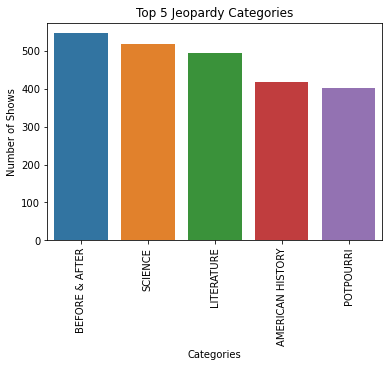

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

five_df = pd.DataFrame(jeopardy_df['Category'].value_counts())
top = five_df.head(5)
top
sns.barplot(x=top.index , y='Category', data = top)
plt.title('Top 5 Jeopardy Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Shows')
plt.xticks(rotation=90)


plt.show()
